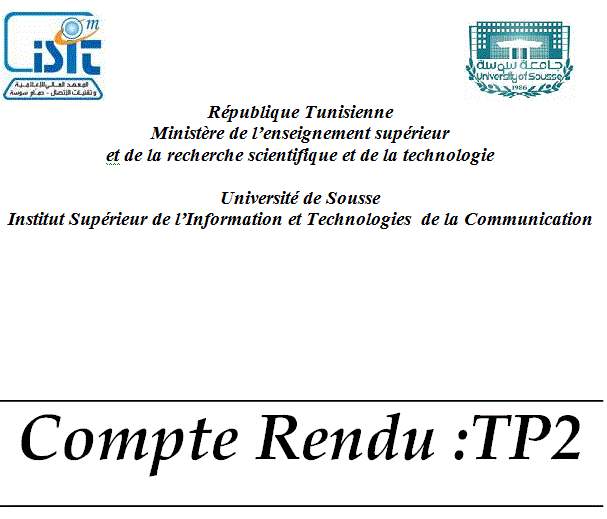

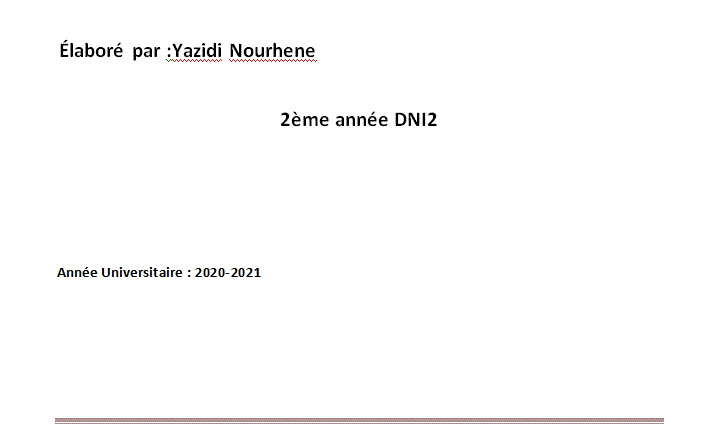

## TP2 Interpolation Numérique

### Motivations:

<html>
    <body>
        <p style="color:darkblue;"> En analyse numérique, une fonction f inconnue explicitement est souvent: connue seulement en certains points x0, x1, ..., xd ou évaluable uniquement au moyen de l’appel à un code côuteux.Mais dans de nombreux cas, on a besoin d’effectuer des opérations (dérivation, intégration,...) sur la fonction f.
On cherche donc à reconstruire f par une autre fonction fr simple et facile à évaluer à partir
des donn´ees discrètes de f. On espère que le modèle fr ne sera pas trop éloigné de la fonction
f aux autres points.</p>
    </body>
</html>
                    

### But du TP :
<html>
    <body>
        <p style="color:darkblue;">
Le but de ce TP est l’implémentation des algorithmes d’interpolation étudiés au cours
en python.</p>
    </body>
</html>

### Méthode de Lagrange:

#### Introduction


<html>
    <body>
        <p style="color:darkblue;">
Soient 𝑛 + 1 couples de données {𝑥𝑖
, 𝑦𝑖}, avec des nœuds différents 𝑥𝑖
. On peut
associer (relier) à ces données un seul et unique polynôme d’interpolation des 𝑦𝑖 aux
nœuds 𝑥𝑖
, ayant un degré inférieur ou égal à 𝑛. Dans le cas général ce polynôme
est donné par :</p>
    </body>
</html>

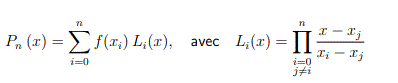

<html>
    <body>
        <p style="color:darkblue;">
Cette relation est appelée formule d’interpolation de Lagrange et les polynômes
𝐿𝑖 sont ses polynômes caractéristiques. Le but de l’interpolation consiste, entre autre,
à substituer une fonction 𝑓(𝑥) (connue analytiquement ou non) par une fonction plus
simple afin de procéder à une intégration numérique ou à un calcul de la dérivée.
L’interpolation sert aussi à construire une représentation synthétique de données
expérimentales quand leurs nombre devient très élevé.</p>
    </body>
</html>

<html>
    <body>
        <p style="color:darkblue;">
le calcul analytique montre ses limites pour
des degrés 𝑛 élevés. Par conséquent, il est nécessaire de développer un algorithme
permettant l’implémentation de la méthode de Lagrange afin de déterminer les
polynômes quelque que soit le degré 𝑛.</p>
    </body>
</html>

## Exercice 1

In [5]:
from numpy import prod
def prog(x,y,c):
    S = [] 
    n = len(x)
    
    for j in range(n):
        L =[c-xx for xx in x]
        for k in range(n):
            if (k == j):                
                L[k] = 1
            else:
                L[k] = L[k]/(x[j] - x[k])   
        S.append(y[j]*prod(L))
        
    return  sum(S)

In [6]:
X=[1 ,2 ,3 ,4];
Y=[-1, 0, 2 ,1];
for i in X:
    print(prog(X,Y,i))
sum(X)

-1.0
0.0
2.0
1.0


10

<html>
    <body>
        <p style="color:darkblue;">
1) Que renvoie la fonction PR lorsqu'on lui déclare x=(x(1),x(2),...,x(n))et y=(y(1),y(2),...,y(n)) deux vecteurs de même longueur n et c un nombre réel.
            </p>
    </body>
</html>

In [7]:
def PR(x,y,c):
    S = []
    n = len(x)
    
    for j in range(n):
        L =[c-xx for xx in x]
        for k in range(n):
            if (k == j):
                L[k] = 1
            else:
                L[k] = L[k]/(x[j] - x[k])
        S.append(y[j]*prod(L))
    return  sum(S)

In [8]:
X=[1 ,2 ,3 ,4];
Y=[-1, 0, 2 ,1];
for i in X:
    print(PR(X,Y,i))
sum(X)

-1.0
0.0
2.0
1.0


10

<html>
    <body>
        <p style="color:darkblue;">
2) Que contient le vecteur  L  après la fin de la boucle  k.
            </p>
    </body>
</html>

In [9]:
x=[1, 2, 3, 4]
y=[-1, 0, 2, 1]

In [10]:
def pr(x,y,c):
    S = [] 
    n = len(x)
    for c in x:
            for j in range(n):
                L =[c-xx for xx in x]
                for k in range(n):
                    if (k == j):                
                        L[k] = 1
                    else:
                        L[k] = L[k]/(x[j] - x[k])   
                S.append(y[j]*prod(L))

            return L[3]

In [12]:
for i in X:
    print(pr(X,Y,i))

1
1
1
1


<html>
    <body>
        <p style="color:darkblue;">
3) Utiliser cette fonction pour dessiner le graph du polynôme de Lagrange de la fonction  𝑓(𝑥)=1/(1+𝑥^2)  aux points  𝑥=[−1:0.1:1].</p>
    </body>
</html>

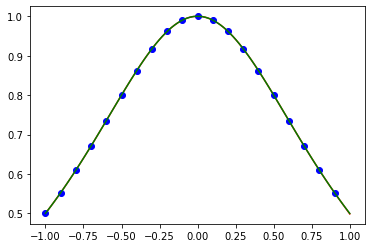

In [13]:
import numpy as np
import matplotlib.pyplot as plt
pt=[]
x=np.arange(-1,1,0.1)
f= lambda x:1/(1+x**2)
y=f(x)
t=np.linspace(-1,1,100)
for u in range(len(t)):
    pt.append(PR(x,y,t[u]))
plt.plot(t,pt,"r",x,y,"bo",t,f(t),"g")
plt.show()

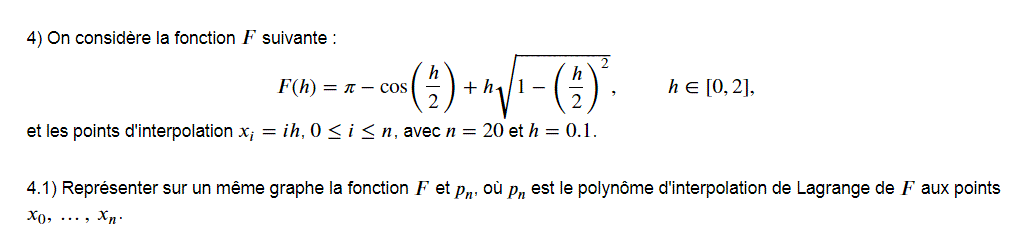

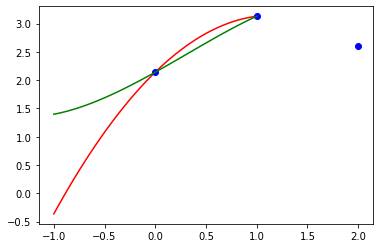

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import math
pn=[]
x=np.arange(0,3)
f= lambda x:math.pi-math.cos(x/2)+x*math.sqrt(1-(x/2)**2)
f1=np.vectorize(f)
y=f1(x)
t=np.linspace(-1,1,100)
for u in range(len(t)):
    pn.append(PR(x,y,t[u]))
plt.plot(t,pn,"r",x,y,"bo",t,f1(t),"g")
plt.show()

<html>
    <body>
        <p style="color:darkblue;">
Dans le cas de l’interpolation de Lagrange l’utilisateur a la liberté de choisir les nœuds d’interpolation {𝑥𝑖}.</p>
    </body>
</html>

<html>
    <body>
        <p style="color:darkblue;">    
4.2)Tracer la courbe d'erreur (la fonction  𝐹−𝑝𝑛 ). Qu'observer vous.</p>
    </body>
</html>

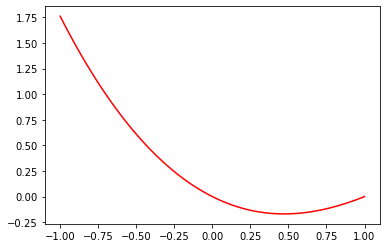

In [66]:
plt.plot(t,f1(t)-pn,"r")
plt.show()

## Exercice 2  ( Phenomène de Runge )

<html>
    <body>
        <p style="color:darkblue;">
1) Vérifier que sur  [−5,5]  le polynôme d'interpolation de Lagrange de la fonction  𝑓  définie par  𝑓(𝑥)=1/(1+𝑥^2) , en  𝑁  points uniformément espacés ne convergent pas correctement aux voisinages de  −1  et  1 , pour  𝑁=7,8,9,10...</p>
    </body>
</html>

Text(0.5, 1.0, 'Interpolation Equidistante avec N=7')

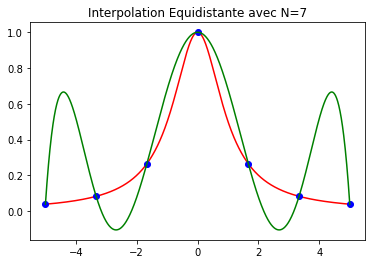

In [69]:
N=7
X=np.linspace(-5,5,N)
f= lambda x:1/(1+x**2)
Y=f(X);
p=np.polyfit(X,Y,N-1)
t=np.linspace(-5,5,1000)
plt.plot(t,f(t),'r',X,Y,'ob', t, np.polyval(p,t),'g')
plt.title("Interpolation Equidistante avec N=7")

Text(0.5, 1.0, 'Interpolation Equidistante avec N=8')

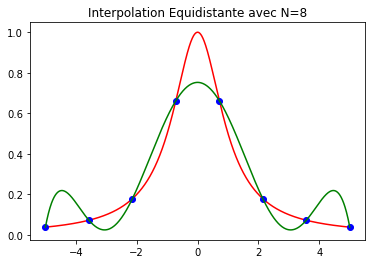

In [70]:
N=8
X=np.linspace(-5,5,N)
Y=f(X)
p=np.polyfit(X,Y,N-1)
t=np.linspace(-5,5,1000);
plt.plot(t,f(t),'r',X,Y,'ob', t, np.polyval(p,t),'g')
plt.title("Interpolation Equidistante avec N=8")

Text(0.5, 1.0, 'Interpolation Equidistante avec N=9')

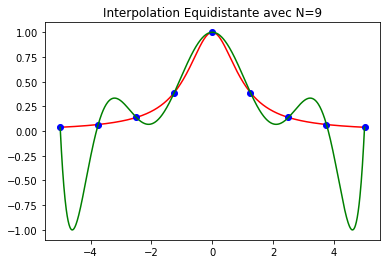

In [71]:
N=9
X=np.linspace(-5,5,N)
Y=f(X)
p=np.polyfit(X,Y,N-1)
t=np.linspace(-5,5,1000)
plt.plot(t,f(t),'r',X,Y,'ob', t, np.polyval(p,t),'g')
plt.title("Interpolation Equidistante avec N=9")

Text(0.5, 1.0, 'Interpolation Equidistante avec N=10')

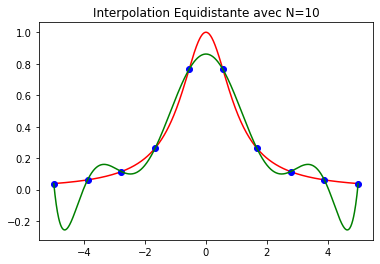

In [72]:
N=10
X=np.linspace(-5,5,N)
Y=f(X)
p=np.polyfit(X,Y,N-1)
t=np.linspace(-5,5,1000)
plt.plot(t,f(t),'r',X,Y,'ob', t, np.polyval(p,t),'g')
plt.title("Interpolation Equidistante avec N=10")

<html>
    <body>
        <p style="color:darkblue;">
On constate une divergence, au voisinage des bornes de
l’intervalle, entre le polynôme interpolateur de Lagrange et la courbe 𝑓(𝑥). Par ailleurs,
plus le degré 𝑛 de ce polynôme est élevé plus la divergence (oscillations sur les bords de
[𝑎, 𝑏]) aux bords de l’intervalle est grande. Ceci est typique d’une convergence irrégulière.
Cet exemple illustre très bien le phénomène de Runge.</p>
    </body>
</html>

<html>
    <body>
        <p style="color:darkblue;">
Plus l’écart entre les points d’interpolation
est réduit meilleure sera la convergence du polynôme de Lagrange. Les choses ne se
présentent pas sur cet aspect, ainsi, Carl Runge a mis en évidence le fait que plus
𝑛 → ∞ plus le polynôme de Lagrange diverge aux bords de l’intervalle [𝑎, 𝑏]. On
comprend dans ce cas, que la convergence n’est pas régulière. Cette irrégularité de
convergence est résolue en procédant à l’interpolation aux points de Tchebychev.</p>
    </body>
</html>

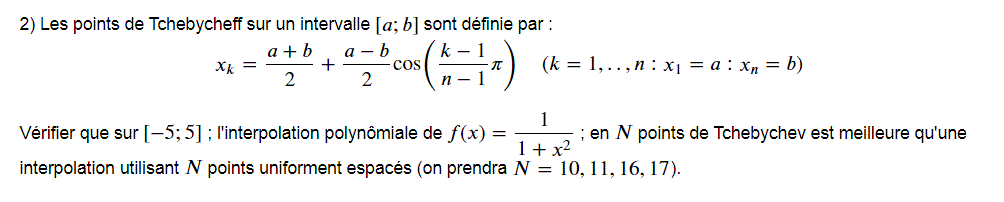

In [74]:
def tcheb(a,b,n):
    v=[]
    for k in range(n):
        v.append((a+b)/2+(a-b)/2*math.cos((k-1)/(n-1)*math.pi))
    return v

In [75]:
tcheb(-5,5,11)

[-4.755282581475767,
 -5.0,
 -4.755282581475767,
 -4.045084971874737,
 -2.938926261462366,
 -1.5450849718747373,
 -3.061616997868383e-16,
 1.5450849718747368,
 2.938926261462365,
 4.045084971874736,
 4.755282581475767]

C:\Users\Mon Pc\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5, 1.0, 'Interpolation Tchebycheff avec N=10')

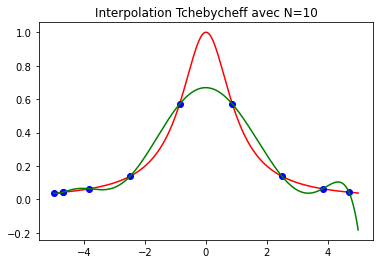

In [76]:
N=10
Yt=[]
f= lambda x:1/(1+x**2)
Xt=tcheb(-5,5,N)
for i in Xt:
    Yt.append(f(i))
pt=np.polyfit(Xt,Yt,N-1)
plt.plot(t,f(t),'r',Xt,Yt,'ob', t, np.polyval(pt,t),'g')
plt.title("Interpolation Tchebycheff avec N=%i"%N)
    

C:\Users\Mon Pc\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5, 1.0, 'Interpolation Tchebycheff avec N=11')

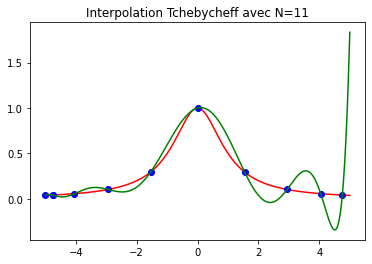

In [77]:
N=11
Yt=[]
f= lambda x:1/(1+x**2)
Xt=tcheb(-5,5,N)
for i in Xt:
    Yt.append(f(i))
pt=np.polyfit(Xt,Yt,N)
plt.plot(t,f(t),'r',Xt,Yt,'ob', t, np.polyval(pt,t),'g')
plt.title("Interpolation Tchebycheff avec N=%i"%N)

C:\Users\Mon Pc\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5, 1.0, 'Interpolation Tchebycheff avec N=16')

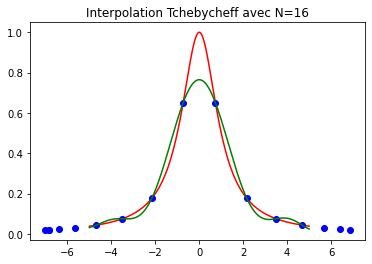

In [78]:
N=16
Yt=[]
f= lambda x:1/(1+x**2)
Xt=tcheb(-7,7,N)
for i in Xt:
    Yt.append(f(i))
pt=np.polyfit(Xt,Yt,N-1)
plt.plot(t,f(t),'r',Xt,Yt,'ob', t, np.polyval(pt,t),'g')
plt.title("Interpolation Tchebycheff avec N=%i"%N)

C:\Users\Mon Pc\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5, 1.0, 'Interpolation Tchebycheff avec N=17')

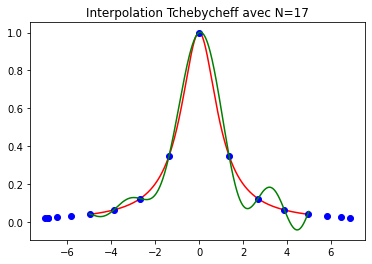

In [79]:
N=17
Yt=[]
f= lambda x:1/(1+x**2)
Xt=tcheb(-7,7,N)
for i in Xt:
    Yt.append(f(i))
pt=np.polyfit(Xt,Yt,N-1)
plt.plot(t,f(t),'r',Xt,Yt,'ob', t, np.polyval(pt,t),'g')
plt.title("Interpolation Tchebycheff avec N=%i"%N)

<html>
    <body>
        <p style="color:darkblue;">
En revanche, dans l’interpolation de Tchebychev, la convergence est uniforme.
De plus, lorsque le nombre de nœuds d’interpolation augmente, la courbe polynomiale se
confond avec la fonction.</p>
    </body>
</html>

<html>
    <body>
        <p style="color:darkblue;">
Nous avons vu précédemment, dans le cas de l’interpolation de Lagrange que l’utilisateur a la liberté de choisir les nœuds d’interpolation {𝑥𝑖}. En
revanche, l’interpolation de Pafnouti Tchebychev, impose un choix des nœuds
(voir, Equation 2 et 3) dans l’intervalle [𝑎, 𝑏], appelés points de Tchebychev.
Il s’agit donc d’une interpolation de Lagrange menée en des points particuliers.
Tenant compte de cette répartition particulière des nœuds, on peut montrer que, si
𝑓(𝑥) est dérivable sur [𝑎, 𝑏], alors 𝑃𝑛(𝑥) converge vers 𝑓(𝑥) quand 𝑛 → ∞ pour
tout 𝑥 ∈ [𝑎, 𝑏]. Ainsi, les nœuds de Tchebychev sont déterminés par minimisation
de la quantité :</p>
    </body>
</html>

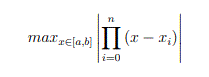

<html>
    <body>
        <p style="color:darkblue;">
En effet, l’équation précédente est minimale pour les nœuds qui annulent les polynômes de
Tchebychev, soit :</p>
    </body>
</html>

<html>
    <body>
        <p style="color:darkblue;">
Equation 2:</p>
    </body>
</html>

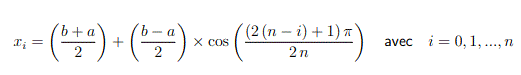

<html>
    <body>
        <p style="color:darkblue;">
Il existe également une autre répartition non uniforme des nœuds d’interpolation,
ayant les mêmes caractéristiques de convergence que les nœuds de Tchebychev, définie
par les nœuds de Tchebychev-Gauss, soit :</p>
    </body>
</html>

<html>
    <body>
        <p style="color:darkblue;">
Equation 3:</p>
    </body>
</html>

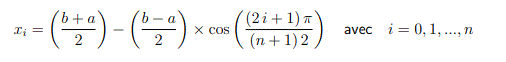

<html>
    <body>
        <p style="color:darkblue;">
L’attrait de choisir les nœuds de Tchebychev, est de se prémunir (lutter) contre le
phénomène de Runge.</p>
    </body>
</html>

## Exercice 3:  Interpolation de Newton

### Introductoion:

<html>
    <body>
        <p style="color:darkblue;">
Le polynôme d'interpolation de Newton obtenu pour (n + 1) points x0; x1; :::; xn prend la forme:</p>
    </body>
</html>

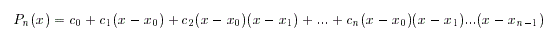

<html>
    <body>
        <p style="color:darkblue;">
Il ne faut pas oublier que le polynôme de Newton sera égal au polynôme de Lagrange (le polynôme
d'interpolation étant unique). Il dièrent simplement dans la forme et par l'algorithme de calcul des
coeffcients.
Les coeffcients ci peuvent se calculer par la résolution du système d'équations linéaires de forme
triangulaire inférieure. La résolution est donc directe par simple substitution comme le montrent
les équations ci-dessous:</p>
    </body>
</html>

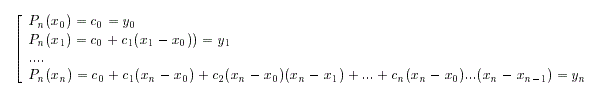

<html>
    <body>
        <p style="color:darkblue;">
Quoi qu'il en soit, une autre méthode permet d'obtenir un algorithme itératif sur le nombre de
points. C'est ici une différence ma jeure avec le polynôme de Lagrange pour lequel, si on a joute un
point, on est obligé de recalculer tous les coeffcients du polynôme.
Remarquons d'abord que le terme ci ne dépend que des xk avec (k = 0,.....i).</p>
    </body>
</html>

<html>
    <body>
        <p style="color:darkblue;">
On considère les deux programmes python suivant :</p>
    </body>
</html>

<html>
    <body>
        <p style="color:darkblue;">
1) Déterminer en utilisant les deux codes puis par un calcul à la main le polynôme de Newton pour les données suivantes :</p>
    </body>
</html>

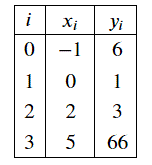

In [16]:
def intN(x,y):
    m=len(x)
    f=np.zeros(m)
    for k in range(1,m):
        f[k:m+1]=np.array(np.array(y[k:m+1])-np.array(y[k-1:m-1]))/np.array(np.array(x[k:m+1])-np.array(x[0:m-k]))
    return f

In [18]:
x=[-1,0,2,5]
y=[6,1,3,66]
intN(x,y)

array([ 0.        , -5.        ,  0.66666667, 10.5       ])

In [ ]:
function p=intNval(x,y,t)
m=length(x);
p=y(m)*ones(size(t));
for k=m-1:-1:1
    p=p.*(t-x(k))+y(k);
end
end

In [19]:
def intNval(x,y,t):
    m=len(x)
    p=y[m-1]*np.ones(len(t))
    for k in range(m-2,-1,-1):
        p=p*np.array((np.array(t)-x[k]))+y[k]
    return p

In [20]:
x=[-1,0,2,5]
y=[6,1,3,66]
t=[0,1,2,3]
intNval(x,y,t)

array([   7., -118.,   27.,  838.])

<html>
    <body>
        <p style="color:darkblue;">
2) Donner le Graph du polynôme trouvé en 1) dans l'intervalle $[-1;5]$.</p>
    </body>
</html>

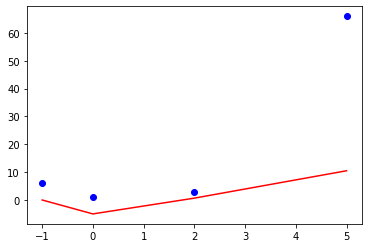

In [21]:
x=[-1,0,2,5]
y=[6,1,3,66]
f=intN(x,y)
plt.plot(x,f,'r',x,y,'ob')
plt.show()

<html>
    <body>
        <p style="color:darkblue;">
3) Calculer $P(1)$ en utilisant le polynôme trouvé en 1).</p>
    </body>
</html>

In [24]:
x=[-1,0,2,5]
y=[6,1,3,66]
t=[0,1,2,3]
p=intNval(x,y,t)
p[0]

7.0